### Ramen Rating Preprocessing

1. Import thư viện

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandasql as pdsql

2. Đọc file dữ liệu

In [3]:
data = pd.read_csv("1.ramen-ratings.csv")
data.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   37 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
print(data.shape)
print(data.count())

(2580, 7)
Review #    2580
Brand       2580
Variety     2580
Style       2578
Country     2580
Stars       2580
Top Ten       37
dtype: int64


In [6]:
print(data.isnull().sum())

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2543
dtype: int64


In [1008]:
data.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [1009]:
data.describe(include=['O'])

,Brand,Variety,Style,Country,Stars,Top Ten
count,2580,2580,2578,2580,2580,37
unique,355,2413,7,38,51,37
top,Nissin,Beef,Pack,Japan,4,2016 #10
freq,381,7,1531,352,384,1


In [1010]:
data.describe(include="all")


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,37
unique,NaN,355,2413,7,38,51,37
top,NaN,Nissin,Beef,Pack,Japan,4,2016 #10
freq,NaN,381,7,1531,352,384,1
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [1011]:
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')

data[['Style','Stars']].groupby(['Style'],as_index=False).mean().sort_values(by='Stars',ascending=False)

,Style,Stars
0,Bar,5.000000
2,Box,4.291667
5,Pack,3.700458
1,Bowl,3.670686
6,Tray,3.545139
3,Can,3.500000
4,Cup,3.498500


In [1012]:
data[['Brand','Stars']].groupby(['Brand'],as_index=False).mean().sort_values(by='Stars',ascending=False)

,Brand,Stars
129,Kimura,5.0
199,ORee Garden,5.0
303,The Ramen Rater Select,5.0
135,Komforte Chockolates,5.0
40,ChoripDong,5.0
...,...,...
54,Dr. McDougall's,0.0
305,Tiger,0.0
127,Kim Ve Wong,0.0
235,Roland,0.0


In [1013]:
data[['Variety','Stars']].groupby(['Variety'],as_index=False).mean().sort_values(by='Stars',ascending=False)

,Variety,Stars
1205,Malaysia Penang Red Curry Noodle,5.0
1247,Mi Goreng Barbecue Chicken,5.0
1379,Nagasaki Sara Udon,5.0
1383,Namja,5.0
1384,Namja Ramen (USA version),5.0
...,...,...
1485,Onion Flaver Rice Noodle,0.0
118,Authentic Street Food Black Bean,0.0
1615,Plain Instant Noodle No Soup Included,NaN
1616,Plain Noodles,NaN


In [1014]:
data[['Country','Stars']].groupby(['Country'],as_index=False).mean().sort_values(by='Stars',ascending=False)

,Country,Stars
2,Brazil,4.350000
28,Sarawak,4.333333
3,Cambodia,4.200000
19,Malaysia,4.154194
29,Singapore,4.126147
17,Indonesia,4.067460
18,Japan,3.981605
21,Myanmar,3.946429
9,Fiji,3.875000
14,Hong Kong,3.801825


In [1015]:
data[['Review #','Stars']].groupby(['Review #'],as_index=False).mean().sort_values(by='Stars',ascending=False)

,Review #,Stars
1910,1911,5.0
1777,1778,5.0
2227,2228,5.0
739,740,5.0
2231,2232,5.0
...,...,...
1781,1782,0.0
2022,2023,0.0
1586,1587,NaN
2457,2458,NaN


### Data Visualization

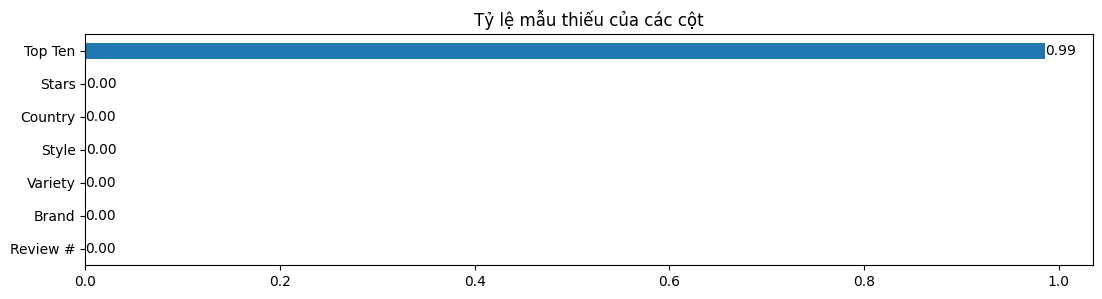

In [1016]:
plt.figure(figsize=(13, 3))
missing_ratio = data.isnull().mean(axis=0)
ax = missing_ratio.plot.barh()
plt.title("Tỷ lệ mẫu thiếu của các cột")
for i, v in enumerate(missing_ratio):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center')

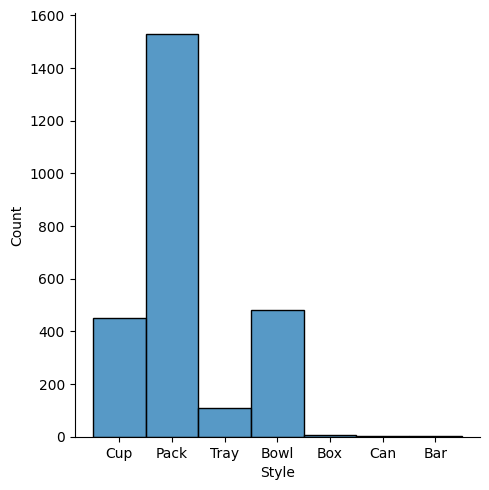

In [1017]:
sns.displot(data['Style'])

<Axes: xlabel='Style', ylabel='Review #'>

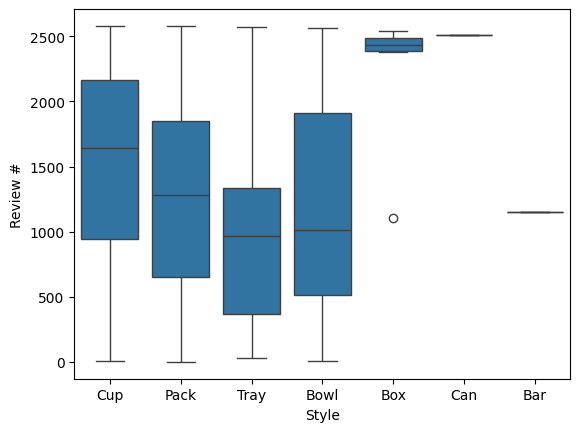

In [1018]:
sns.boxplot(x=data['Style'], y=data['Review #'])

Kiểu ramen được sử dụng nhiều nhất trong tập dữ liệu là Pack.
Kiểu ramen được review nhiều nhất trong tập dữ liệu là Cup.

In [1019]:
custom_aggregation = {"Country": "count"}
data1 = data.groupby("Country").agg(custom_aggregation)

data1.columns = ["Count"]
data1['Country'] = data1.index

fig = px.bar(data1, x='Country', y="Count", color="Country", title="Số lượng quốc gia trong tập dữ liệu")
fig.show()

In [1020]:
vairety_data = pdsql.sqldf("SELECT Brand,count(Variety) as Number_Of_Variety FROM data GROUP BY Brand ")
vairety_data.sort_values(by = 'Number_Of_Variety',ascending =False,inplace =True)

([<matplotlib.patches.Wedge at 0x291c2e26a70>,
 [Text(0.35169821898912457, 1.1473048255628833, 'Nissin'),
  Text(-1.060916101822566, 0.29061490824390135, 'Nongshim'),
  Text(-1.046162158377023, -0.33991872319707317, 'Maruchan'),
  Text(-0.7620647497678155, -0.7932574091436632, 'Mama'),
  Text(-0.3329183249928178, -1.0484108874310571, 'Paldo'),
  Text(0.13567789516583303, -1.0916004345745605, 'Myojo'),
  Text(0.5382850852837401, -0.9592961831265028, 'Indomie'),
  Text(0.8352516134569611, -0.7157895935381734, 'Samyang Foods'),
  Text(1.0211219021364348, -0.40903552532423093, 'Ottogi'),
  Text(1.0929059039799023, -0.12472644084504683, 'Vina Acecook')],
 [Text(0.20515729441032263, 0.6692611482450153, '40.5%'),
  Text(-0.5786815100850359, 0.1585172226784916, '10.4%'),
  Text(-0.5706339045692853, -0.18541021265294896, '8.1%'),
  Text(-0.4156716816915357, -0.4326858595329071, '7.6%'),
  Text(-0.18159181363244606, -0.5718604840533038, '7.0%'),
  Text(0.07400612463590892, -0.5954184188588512, '

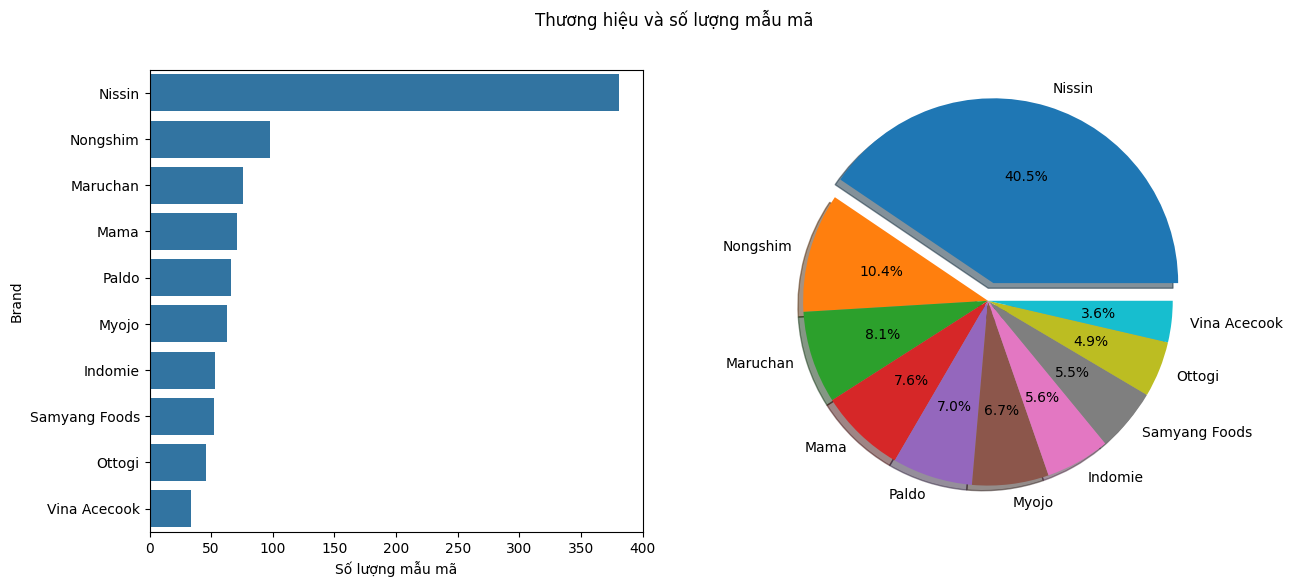

In [1021]:
fig = plt.figure(figsize = (14,6))
fig.suptitle('Thương hiệu và số lượng mẫu mã')

ax1 = fig.add_subplot(121)
sns.barplot(data = vairety_data.head(10),y='Brand' ,x= 'Number_Of_Variety',orient='h',ax =ax1)
plt.xlabel('Số lượng mẫu mã')

ax2 = fig.add_subplot(122)
plt.pie(vairety_data.head(10)['Number_Of_Variety'],
        explode = (0.1,0,0,0,0,0,0,0,0,0),labels =vairety_data.head(10)['Brand'],
        autopct='%1.1f%%',
        shadow =True)

<Figure size 640x480 with 0 Axes>

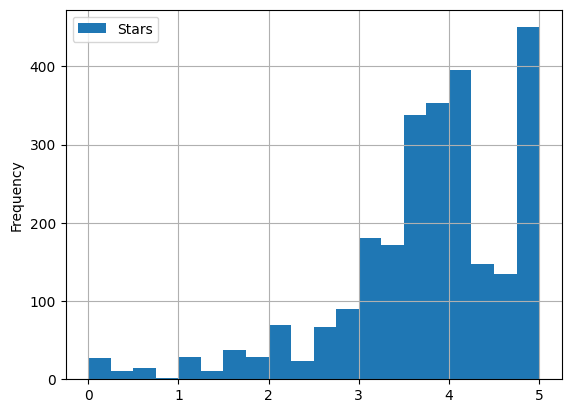

In [1022]:
#Biểu đồ tần xuất cột Star:
plt.figure()
data[['Stars']].plot.hist(alpha=1, bins=20)
plt.grid(True)

### Xử lý dữ liệu thiếu

In [1023]:
data.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          3
Top Ten     2543
dtype: int64

In [1024]:
data.shape

(2580, 7)

In [1025]:
#Xóa cột Top Ten khỏi DataFrame
data = data.drop(columns=["Top Ten"],axis =1)
data.head(10)

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.50


In [1026]:
# Check which rows have nans
data[pd.isnull(data).any(axis=1)]

,Review #,Brand,Variety,Style,Country,Stars
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00


In [1027]:
#Fille null categorical value with Mode
data['Style'].fillna(data['Style'].mode()[0], inplace=True)
#replace Nan of Stars with median Stars
data['Stars'].fillna(data['Stars'].median(), inplace=True )

In [1028]:
data.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

In [1029]:
data.shape

(2580, 6)

In [1030]:
count_unique_brand = data['Brand'].value_counts()
brand_dict = count_unique_brand.to_dict()
brand_dict

{'Nissin': 381,
 'Nongshim': 98,
 'Maruchan': 76,
 'Mama': 71,
 'Paldo': 66,
 'Myojo': 63,
 'Indomie': 53,
 'Samyang Foods': 52,
 'Ottogi': 46,
 'Lucky Me!': 34,
 'Vina Acecook': 34,
 'Vifon': 33,
 'Maggi': 30,
 'Mamee': 29,
 'Master Kong': 28,
 'MAMA': 27,
 'A-Sha Dry Noodle': 26,
 'KOKA': 25,
 'Wai Wai': 25,
 'Sapporo Ichiban': 25,
 'MyKuali': 24,
 'Ve Wong': 24,
 'JML': 23,
 'Samyang': 19,
 'Koka': 18,
 'Batchelors': 16,
 'Doll': 16,
 'Mr. Noodles': 15,
 'Kamfen': 15,
 'Acecook': 15,
 'Wei Lih': 15,
 'Takamori Kosan': 14,
 'Asian Thai Foods': 14,
 'Little Cook': 14,
 'Sau Tao': 14,
 "Vit's": 13,
 'Deshome': 13,
 'Unif': 13,
 'Dragonfly': 13,
 'Saigon Ve Wong': 13,
 'Wu-Mu': 12,
 "Annie Chun's": 12,
 'Uni-President': 12,
 'Yum Yum': 12,
 'ABC': 12,
 'Mi Sedaap': 12,
 'Golden Wheat': 12,
 'Shirakiku': 11,
 'Baijia': 11,
 'Pot Noodle': 11,
 'Yamachan': 11,
 'Unif / Tung-I': 11,
 'Ibumie': 10,
 'Fuku': 10,
 'Wugudaochang': 10,
 'Sichuan Baijia': 10,
 'Ko-Lee': 10,
 'Thai Kitchen': 10,
 

In [1031]:
list_brand_greater_5 = [key for key, value in brand_dict.items() if value > 5]
list_brand_greater_5

['Nissin',
 'Nongshim',
 'Maruchan',
 'Mama',
 'Paldo',
 'Myojo',
 'Indomie',
 'Samyang Foods',
 'Ottogi',
 'Lucky Me!',
 'Vina Acecook',
 'Vifon',
 'Maggi',
 'Mamee',
 'Master Kong',
 'MAMA',
 'A-Sha Dry Noodle',
 'KOKA',
 'Wai Wai',
 'Sapporo Ichiban',
 'MyKuali',
 'Ve Wong',
 'JML',
 'Samyang',
 'Koka',
 'Batchelors',
 'Doll',
 'Mr. Noodles',
 'Kamfen',
 'Acecook',
 'Wei Lih',
 'Takamori Kosan',
 'Asian Thai Foods',
 'Little Cook',
 'Sau Tao',
 "Vit's",
 'Deshome',
 'Unif',
 'Dragonfly',
 'Saigon Ve Wong',
 'Wu-Mu',
 "Annie Chun's",
 'Uni-President',
 'Yum Yum',
 'ABC',
 'Mi Sedaap',
 'Golden Wheat',
 'Shirakiku',
 'Baijia',
 'Pot Noodle',
 'Yamachan',
 'Unif / Tung-I',
 'Ibumie',
 'Fuku',
 'Wugudaochang',
 'Sichuan Baijia',
 'Ko-Lee',
 'Thai Kitchen',
 'Amianda',
 'Sakurai Foods',
 'New Touch',
 'Menraku',
 'SuperMi',
 'Knorr',
 'Suimin',
 'Hao Way',
 'Sunlee',
 'Four Seas',
 'Pulmuone',
 'Chewy',
 'Jingqi',
 'Tseng Noodles',
 'Mee Jang',
 'Great Value',
 'CarJEN',
 'GaGa',
 'Wu Mu

In [1032]:
data['Brand'] = data['Brand'].apply(lambda x: x if x in list_brand_greater_5 else 'Other')
data

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Other,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Other,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...,...
2575,5,Vifon,Hu Tiu Nam Vang [Phnom Penh style] Asian Style...,Bowl,Vietnam,3.50
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


In [1033]:
data['Brand'].value_counts()

Brand
Other                560
Nissin               381
Nongshim              98
Maruchan              76
Mama                  71
                    ... 
Mr. Lee's Noodles      6
Ruski                  6
Unox                   6
Vedan                  6
Rhee Bros Assi         6
Name: count, Length: 98, dtype: int64

### Bổ sung thuộc tính mới từ thuộc tính đã có

In [1034]:
data['Variety'].value_counts()

Variety
Beef                                              7
Chicken                                           7
Yakisoba                                          6
Artificial Chicken                                6
Vegetable                                         6
                                                 ..
Oh! Ricey Pho Ga                                  1
Veggie Noodle Black Sesame Noodle                 1
Nuudeli Liha Nudlar Kott                          1
Artificial Beef Instant Noodles With Soup Base    1
Tom Yum Chili Flavor                              1
Name: count, Length: 2413, dtype: int64

In [1035]:
variety = data['Variety'].str.split(' ')
variety_dict = [word for sublist in variety for word in sublist]
variety_dict = {word: variety_dict.count(word) for word in set(variety_dict)}
sorted_variety_dict = dict(sorted(variety_dict.items(), key=lambda item: item[1], reverse=True))
sorted_variety_dict

{'Noodles': 674,
 'Noodle': 514,
 'Instant': 446,
 'Flavour': 404,
 'Ramen': 340,
 'Chicken': 320,
 'Flavor': 317,
 'Spicy': 268,
 'Beef': 233,
 'Cup': 197,
 'Soup': 193,
 'With': 169,
 'Sauce': 144,
 'Rice': 139,
 'Artificial': 133,
 'Shrimp': 126,
 'Curry': 125,
 '&': 125,
 'Mi': 123,
 'Tom': 122,
 'Hot': 115,
 'Seafood': 109,
 'Pork': 101,
 'Bowl': 100,
 'Style': 89,
 'Yum': 83,
 'Udon': 77,
 'Goreng': 76,
 'Vermicelli': 59,
 'Demae': 58,
 'Oriental': 57,
 'Sesame': 56,
 'Penang': 54,
 'Vegetable': 53,
 'Tonkotsu': 52,
 'Yakisoba': 50,
 'Mushroom': 48,
 'Vegetarian': 47,
 'Rasa': 46,
 'Ramyun': 45,
 'Kimchi': 42,
 'Miso': 42,
 'Soy': 42,
 'Black': 41,
 'Chow': 41,
 'Sour': 40,
 'Shoyu': 38,
 'Fried': 38,
 'Japanese': 37,
 'Mein': 37,
 'Big': 37,
 'King': 36,
 'Onion': 36,
 'Creamy': 36,
 'Laksa': 35,
 'A': 35,
 'Super': 35,
 'Thai': 35,
 'Oil': 34,
 'Tomato': 34,
 'Sabor': 32,
 'White': 32,
 'Korean': 32,
 'Original': 30,
 'Yam': 30,
 'Crab': 30,
 'Ayam': 29,
 'Snack': 28,
 'Chili':

In [1036]:
def contain_flavor(word):
    word_lower = word.lower()
    return 1 if 'flavor' in word_lower or 'flavour' in word_lower else 0
data['Contain_Flavor'] = data['Variety'].apply(contain_flavor)
data

,Review #,Brand,Variety,Style,Country,Stars,Contain_Flavor
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Other,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,1
4,2576,Other,Singapore Curry,Pack,India,3.75,0
...,...,...,...,...,...,...,...
2575,5,Vifon,Hu Tiu Nam Vang [Phnom Penh style] Asian Style...,Bowl,Vietnam,3.50,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1


In [1037]:
meat_types = ['chicken', 'beef', 'pork', 'shrimp', 'seafood', 'crab', 'fish', 'duck', 'turkey']
def meat_scanner(word):
    word_lower = word.lower()
    for meat in meat_types:
        if meat in word_lower:
            return meat
    return 'other'
data['Meat_Types'] = data['Variety'].apply(meat_scanner)
data

,Review #,Brand,Variety,Style,Country,Stars,Contain_Flavor,Meat_Types
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,other
1,2579,Other,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,other
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,chicken
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,1,other
4,2576,Other,Singapore Curry,Pack,India,3.75,0,other
...,...,...,...,...,...,...,...,...
2575,5,Vifon,Hu Tiu Nam Vang [Phnom Penh style] Asian Style...,Bowl,Vietnam,3.50,0,other
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,other
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,shrimp
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,other


In [1038]:
def is_spicy(word):
    word_lower = word.lower()
    spc = ['spicy', 'spicies', 'chili', 'chilli', 'hot']
    for i in spc:
        if i in word_lower:
            return 1
    return 0
data['Is_Spicy'] = data['Variety'].apply(is_spicy)
data

,Review #,Brand,Variety,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,other,0
1,2579,Other,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,other,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,chicken,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,1,other,0
4,2576,Other,Singapore Curry,Pack,India,3.75,0,other,0
...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,Hu Tiu Nam Vang [Phnom Penh style] Asian Style...,Bowl,Vietnam,3.50,0,other,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,other,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,shrimp,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,other,1


In [1039]:
noodle_types = ['noodle', 'udon', 'soba', 'egg', 'ramen']
def noodle_scanner(word):
    word_lower = word.lower()
    for noodle in noodle_types:
        if noodle in word_lower:
            return noodle
    return 'other'
data['Noodle_Types'] = data['Variety'].apply(noodle_scanner)
data        

,Review #,Brand,Variety,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,other,0,other
1,2579,Other,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,other,1,noodle
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,chicken,0,noodle
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,1,other,0,ramen
4,2576,Other,Singapore Curry,Pack,India,3.75,0,other,0,other
...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,Hu Tiu Nam Vang [Phnom Penh style] Asian Style...,Bowl,Vietnam,3.50,0,other,0,noodle
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,other,0,noodle
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,shrimp,0,other
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,1,other,1,other


In [1040]:
data = data.drop('Variety', axis=1)
data

,Review #,Brand,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types
0,2580,New Touch,Cup,Japan,3.75,0,other,0,other
1,2579,Other,Pack,Taiwan,1.00,0,other,1,noodle
2,2578,Nissin,Cup,USA,2.25,0,chicken,0,noodle
3,2577,Wei Lih,Pack,Taiwan,2.75,1,other,0,ramen
4,2576,Other,Pack,India,3.75,0,other,0,other
...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,Bowl,Vietnam,3.50,0,other,0,noodle
2576,4,Wai Wai,Pack,Thailand,1.00,0,other,0,noodle
2577,3,Wai Wai,Pack,Thailand,2.00,0,shrimp,0,other
2578,2,Wai Wai,Pack,Thailand,2.00,1,other,1,other


In [1041]:
data['Country'].value_counts()

Country
Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64

In [1042]:
data['Country'] = data['Country'].replace({'United States':'USA'})
data['Country'].value_counts()

Country
Japan          352
USA            324
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
UK              69
Philippines     47
Canada          41
India           31
Germany         27
Mexico          25
Australia       22
Netherlands     15
Nepal           14
Myanmar         14
Hungary          9
Pakistan         9
Bangladesh       7
Colombia         6
Cambodia         5
Brazil           5
Poland           4
Holland          4
Fiji             4
Sweden           3
Sarawak          3
Finland          3
Dubai            3
Ghana            2
Estonia          2
Nigeria          1
Name: count, dtype: int64

### Xử lý ngoại lệ

In [1043]:
data.shape

(2580, 9)

In [1044]:
data['Style'].value_counts()

Style
Pack    1533
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

<Axes: ylabel='Style'>

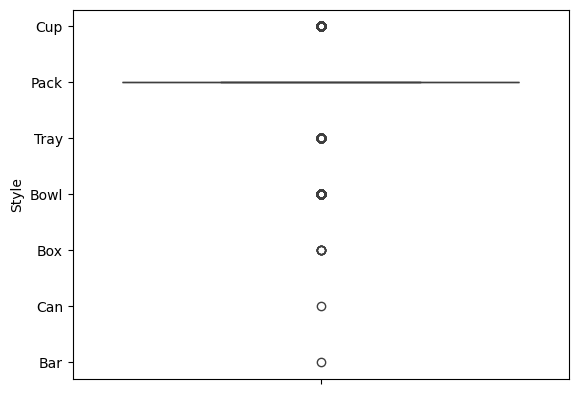

In [1045]:
sns.boxplot(y='Style', data=data)

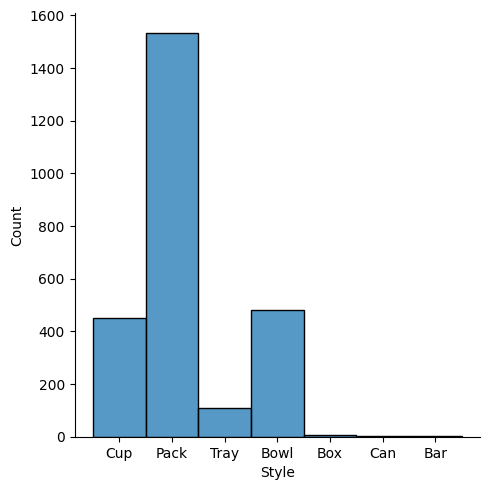

In [1046]:
sns.displot(data['Style'])

In [1047]:
filt = data['Style'].isin(['Bar', 'Box', 'Can'])
data[filt]

,Review #,Brand,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types
36,2544,Other,Box,USA,1.50,0,chicken,0,noodle
67,2513,Other,Can,USA,3.50,1,chicken,0,ramen
80,2500,Other,Box,Malaysia,5.00,0,other,0,noodle
139,2441,MyKuali,Box,Japan,5.00,1,other,0,noodle
161,2419,MyKuali,Box,Japan,5.00,0,other,0,other
203,2377,MyKuali,Box,Malaysia,5.00,0,other,0,noodle
1425,1155,Other,Bar,USA,5.00,0,other,0,ramen
1471,1109,Other,Box,Indonesia,4.25,0,other,0,other


In [1048]:
data = data[~filt]
data

,Review #,Brand,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types
0,2580,New Touch,Cup,Japan,3.75,0,other,0,other
1,2579,Other,Pack,Taiwan,1.00,0,other,1,noodle
2,2578,Nissin,Cup,USA,2.25,0,chicken,0,noodle
3,2577,Wei Lih,Pack,Taiwan,2.75,1,other,0,ramen
4,2576,Other,Pack,India,3.75,0,other,0,other
...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,Bowl,Vietnam,3.50,0,other,0,noodle
2576,4,Wai Wai,Pack,Thailand,1.00,0,other,0,noodle
2577,3,Wai Wai,Pack,Thailand,2.00,0,shrimp,0,other
2578,2,Wai Wai,Pack,Thailand,2.00,1,other,1,other


In [1049]:
data['Style'].value_counts()

Style
Pack    1533
Bowl     481
Cup      450
Tray     108
Name: count, dtype: int64

In [1050]:
data.shape

(2572, 9)

In [1051]:
data.tail(15)

,Review #,Brand,Style,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types
2565,15,Samyang,Pack,South Korea,2.5,0,other,0,other
2566,14,Samyang,Pack,South Korea,3.5,0,other,1,other
2567,13,Sapporo Ichiban,Pack,Japan,5.0,0,other,0,other
2568,12,Sapporo Ichiban,Pack,Japan,2.5,1,shrimp,0,other
2569,11,Six Fortune,Pack,South Korea,2.0,1,chicken,0,noodle
2570,10,Other,Pack,USA,1.5,0,beef,0,other
2571,9,Other,Cup,South Korea,2.0,0,other,0,noodle
2572,8,Other,Pack,Taiwan,3.0,0,beef,0,noodle
2573,7,Ve Wong,Pack,Vietnam,1.0,0,pork,0,other
2574,6,Vifon,Pack,Vietnam,2.5,0,other,0,other


### Mã hoá dữ liệu CATEGORICAL

* Các cột cần mã hóa:
    - Brand
    - Variety
    - Style
    - Country
    

* Mã hóa cột Style 

##### Trước khi mã hóa cột Style

In [1052]:
data[['Style']].head(10)

,Style
0,Cup
1,Pack
2,Cup
3,Pack
4,Pack
5,Pack
6,Cup
7,Tray
8,Pack
9,Pack


##### Sau khi mã hóa cột Style

In [1053]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder_data = encoder.fit_transform(data[['Style']]).toarray()

column_names = [f"{value}" for value in encoder.get_feature_names_out(['Style'])]
new_data = pd.DataFrame(encoder_data, columns=column_names)
data=data.join(new_data)
data.drop('Style',axis=1,inplace=True)
data.head(10)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data['Style'] = le.fit_transform(data['Style'])
# data

,Review #,Brand,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types,Style_Bowl,Style_Cup,Style_Pack,Style_Tray
0,2580,New Touch,Japan,3.75,0,other,0,other,0.0,1.0,0.0,0.0
1,2579,Other,Taiwan,1.00,0,other,1,noodle,0.0,0.0,1.0,0.0
2,2578,Nissin,USA,2.25,0,chicken,0,noodle,0.0,1.0,0.0,0.0
3,2577,Wei Lih,Taiwan,2.75,1,other,0,ramen,0.0,0.0,1.0,0.0
4,2576,Other,India,3.75,0,other,0,other,0.0,0.0,1.0,0.0
5,2575,Samyang Foods,South Korea,4.75,0,other,0,ramen,0.0,0.0,1.0,0.0
6,2574,Acecook,Japan,4.00,0,other,0,other,0.0,1.0,0.0,0.0
7,2573,Other,Japan,3.75,0,other,0,udon,0.0,0.0,0.0,1.0
8,2572,Other,Japan,0.25,0,other,0,ramen,0.0,0.0,1.0,0.0
9,2571,KOKA,Singapore,2.50,0,other,1,noodle,0.0,0.0,1.0,0.0


* Mã hóa cột Brand, Variety, Country

##### Trước khi mã hóa

In [1054]:
data[['Brand','Meat_Types', 'Noodle_Types','Country']].head(10)

,Brand,Meat_Types,Noodle_Types,Country
0,New Touch,other,other,Japan
1,Other,other,noodle,Taiwan
2,Nissin,chicken,noodle,USA
3,Wei Lih,other,ramen,Taiwan
4,Other,other,other,India
5,Samyang Foods,other,ramen,South Korea
6,Acecook,other,other,Japan
7,Other,other,udon,Japan
8,Other,other,ramen,Japan
9,KOKA,other,noodle,Singapore


##### Sau khi mã hóa

In [1055]:
frequency_brand = (data['Brand'].value_counts() / len(data) ).to_dict()
data['Brand'] = data['Brand'].map(frequency_brand)

frequency_meat_types = (data['Meat_Types'].value_counts() / len(data) ).to_dict()
data['Meat_Types'] = data['Meat_Types'].map(frequency_meat_types)

frequency_noodle_types = (data['Noodle_Types'].value_counts() / len(data) ).to_dict()
data['Noodle_Types'] = data['Noodle_Types'].map(frequency_noodle_types)

frequency_country = (data['Country'].value_counts() / len(data) ).to_dict()
data['Country'] = data['Country'].map(frequency_country)

# data[['Brand','Variety','Country']].head(10)
data.head()

,Review #,Brand,Country,Stars,Contain_Flavor,Meat_Types,Is_Spicy,Noodle_Types,Style_Bowl,Style_Cup,Style_Pack,Style_Tray
0,2580,0.003499,0.136081,3.75,0,0.63297,0,0.411353,0.0,1.0,0.0,0.0
1,2579,0.215785,0.087092,1.00,0,0.63297,1,0.443235,0.0,0.0,1.0,0.0
2,2578,0.148134,0.124806,2.25,0,0.12675,0,0.443235,0.0,1.0,0.0,0.0
3,2577,0.005832,0.087092,2.75,1,0.63297,0,0.094090,0.0,0.0,1.0,0.0
4,2576,0.215785,0.012053,3.75,0,0.63297,0,0.411353,0.0,0.0,1.0,0.0


Dữ liệu sau khi đã được tiền xử lý

In [1]:
star = data.pop('Stars')
data['Stars'] = star

NameError: name 'data' is not defined

In [1057]:
data.shape

(2572, 12)

In [1058]:
data.to_csv('ramen-rating-cleaned.csv', index=False)

### Xây dựng mô hình

In [1059]:

import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('ramen-rating-cleaned_final.csv')
#df = pd.read_csv('1.ramen-ratings.csv')
#df = df.drop('Top Ten', axis=1)
#df = df.drop('Review #', axis=1)
#le = LabelEncoder()
#df = df.apply(le.fit_transform)
dt_train, dt_test = train_test_split(df, test_size = 0.3, shuffle = True, random_state=27)

x_train = dt_train.iloc[:, :11]
x_test = dt_test.iloc[:, :11]
y_train = dt_train.iloc[:, 11]
y_test = dt_test.iloc[:, 11]

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred_linear = model1.predict(x_test)
y = np.array(y_test)

r2 = r2_score(y_test, y_pred_linear)
print("R2: %.3f" %r2, end='\n\n')

nse = 1 - (np.sum((y_test - y_pred_linear)**2) / np.sum((y_test - np.mean(y_test))**2))
print("NSE: %.3f" %nse, end='\n\n')

mae = mean_absolute_error(y_test, y_pred_linear)
print("MAE: %.3f" %mae, end='\n\n')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE: %.3f" %rmse, end='\n\n')

R2: 0.087

NSE: 0.087

MAE: 0.702

RMSE: 0.994



Lasso

In [1060]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha = 0.001, max_iter=500)
model2.fit(x_train,y_train)

y_pred_lasso = model2.predict(x_test)
y = np.array(y_test)

r2 = r2_score(y_test, y_pred_lasso)
print("R2: %.3f" %r2, end='\n\n')

nse = 1 - (np.sum((y_test - y_pred_lasso)**2) / np.sum((y_test - np.mean(y_test))**2))
print("NSE: %.3f" %nse, end='\n\n')

mae = mean_absolute_error(y_test, y_pred_lasso)
print("MAE: %.3f" %mae, end='\n\n')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE: %.3f" %rmse, end='\n\n')

R2: 0.088

NSE: 0.088

MAE: 0.702

RMSE: 0.994



In [1061]:
from sklearn.linear_model import Ridge

model3 = Ridge(alpha = 1, max_iter=500)
model3.fit(x_train,y_train)

y_pred_ridge = model3.predict(x_test)
y = np.array(y_test)

r2 = r2_score(y_test, y_pred_ridge)
print("R2: %.3f" %r2, end='\n\n')

nse = 1 - (np.sum((y_test - y_pred_ridge)**2) / np.sum((y_test - np.mean(y_test))**2))
print("NSE: %.3f" %nse, end='\n\n')

mae = mean_absolute_error(y_test, y_pred_ridge)
print("MAE: %.3f" %mae, end='\n\n')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE: %.3f" %rmse, end='\n\n')

R2: 0.087

NSE: 0.087

MAE: 0.702

RMSE: 0.995



In [1128]:
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(activation='tanh', hidden_layer_sizes=[10,10], solver='lbfgs', alpha=0.001, max_iter=500)
model4.fit(x_train, y_train)
y_pred_mlp = model4.predict(x_test)
y = np.array(y_test)

r2 = r2_score(y_test, y_pred_mlp)
print("R2: %.3f" %r2, end='\n\n')

nse = 1 - (np.sum((y_test - y_pred_mlp)**2) / np.sum((y_test - np.mean(y_test))**2))
print("NSE: %.3f" %nse, end='\n\n')

mae = mean_absolute_error(y_test, y_pred_mlp)
print("MAE: %.3f" %mae, end='\n\n')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE: %.3f" %rmse, end='\n\n')

R2: 0.103

NSE: 0.103

MAE: 0.693

RMSE: 0.986



c:\Users\chimi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [ ]:
from sklearn.cluster import KMeans


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a8dcd8a-6094-42f8-ab37-cad9a1b2dd78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>